In [ ]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import CL_model_ToBeFilled as model
import solvers_LabII as solvers

In [2]:
mesh, BCs = geometry.getBar()
coordinates, connectivity = mesh['coordinates'], mesh['connectivity']

modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

modelA.material.setProperties(1, 0, 1, 0.1)
modelA.section.setProperties(1)

modelA.setBoundaryConditions(BCs)

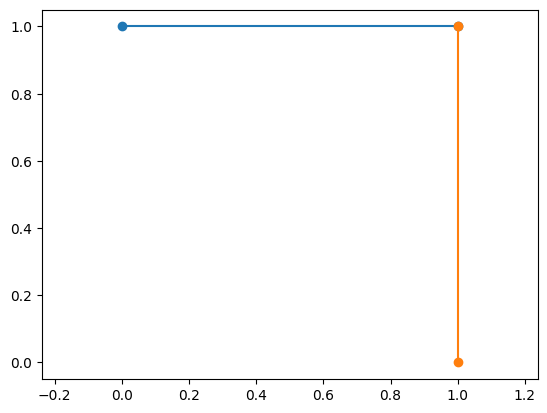

In [3]:
modelA.plotUndeformed()

In [4]:
solver = solvers.Static()

solver.setConstraint('Load')
solver.setTolerance(1e-3)
solver.setMaxIterations(20)
solver.setSolutionAttempts(5)

In [5]:
# Task 2: Assume load control and apply a static load in steps so as to ensure plastic deformation
u, lambdas= solver.solve(modelA, np.hstack(( 0.1*np.ones(11), -0.1*np.ones(23), 0.1*np.ones(12))))

  0%|          | 0/46 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 2
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 3
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 4
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 5
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 6
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 7
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 8
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 9
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 0.000e+00
Step 10
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 6.163e-33
Step 11
  Attempt 1
    Failed to reach convergence after 20 iterations
    Residual norm 4.627e-01
    Reduc

Text(0, 0.5, '$\\lambda$')

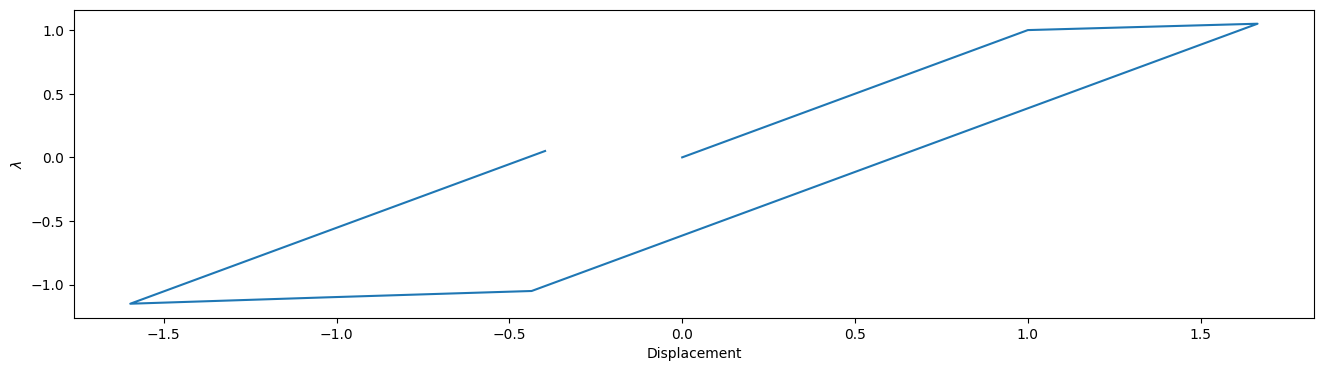

In [6]:
plt.figure(figsize=(16, 4))
plt.plot(u, lambdas)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

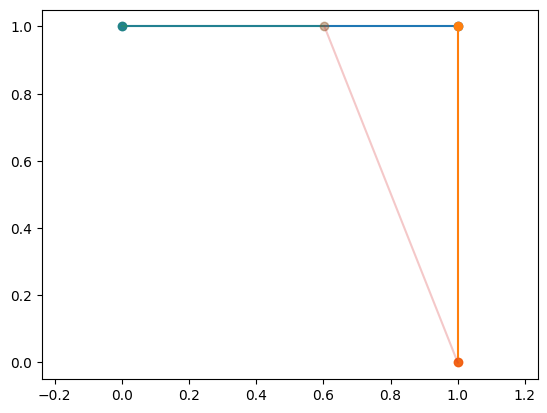

In [7]:
modelA.plotUndeformed()
modelA.plotDeformed(scale=1, alpha=0.25)